In [1]:
import pandas as pd
import numpy as np

import os
from sys import argv
import joblib

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, r2_score
import sklearn

from pathlib import Path

In [2]:
classification_datasets = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
regression_datasets = ["bike_sharing", "facebook", "housing", "real_estate", "solar_flare", "student_scores", "wine_quality"]

datasets = []
datasets.extend(classification_datasets)
datasets.extend(regression_datasets)

cls_models = ["decision_tree", "logit", "nb"]
reg_models = ["decision_tree", "lin_reg"]

data_names = {"breast_cancer":"Breast Cancer", "compas": "COMPAS", "diabetes":"Diabetes", "income": "Adult Income",
              "iris": "Iris", "mushroom": "Mushroom", "nursery": "Nursery", "bike_sharing":"Bike Rentals", 
              "facebook": "Facebook", "housing":"Housing", "real_estate": "Real Estate", "solar_flare": "Solar Flare", 
              "student_scores": "Student Results", "wine_quality": "Wine Quality"}

PATH = Path(os.getcwd()).parent

# Check Model Accuracy

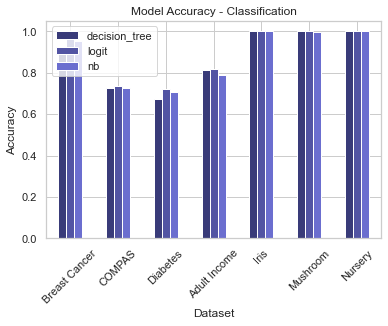

,decision_tree,logit,nb
Breast Cancer,0.890625,0.976562,0.953125
COMPAS,0.724311,0.734336,0.725146
Diabetes,0.670807,0.720497,0.708075
Adult Income,0.812965,0.816153,0.790436
Iris,1.000000,1.000000,1.000000
Mushroom,1.000000,1.000000,0.995319
Nursery,1.000000,1.000000,1.000000


In [3]:
cls_train_acc = np.zeros((len(classification_datasets),len(cls_models)))
cls_test_acc = np.zeros((len(classification_datasets),len(cls_models)))

for i in range(len(classification_datasets)):
    data = classification_datasets[i]
    X_train = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Xtrain.csv"), sep = ";").values
    X_test = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Xtest.csv"), sep = ";").values
    X_validation = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Xvalidation.csv"), sep = ";").values
    test_x = np.vstack([X_test, X_validation])
    
    y_train = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Ytrain.csv"), sep = ";").values
    y_test = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Ytest.csv"), sep = ";").values
    y_validation = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Yvalidation.csv"), sep = ";").values
    test_y = np.vstack([y_test, y_validation])
    
    for j in range(len(cls_models)):
        classifier = cls_models[j]

        cls = joblib.load(os.path.join(PATH, data, classifier, "cls.joblib"))
        
        train_acc = accuracy_score(y_train, cls.predict(X_train))
        test_acc = accuracy_score(test_y, cls.predict(test_x))

        cls_train_acc[i][j] = train_acc
        cls_test_acc[i][j] = test_acc

df_cls_acc = pd.DataFrame(cls_test_acc, index=[data_names[data] for data in classification_datasets],
                  columns = cls_models)

sns.set_theme(style="whitegrid", palette="tab20b")                  
df_cls_acc.plot.bar()
plt.xticks(rotation = 0)
plt.title("Model Accuracy - Classification")
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.xticks(rotation = 45)
#plt.savefig(final_folder+dataset+"_"+cls_method+"_"+bin_type+".eps")
plt.show()

df_cls_acc

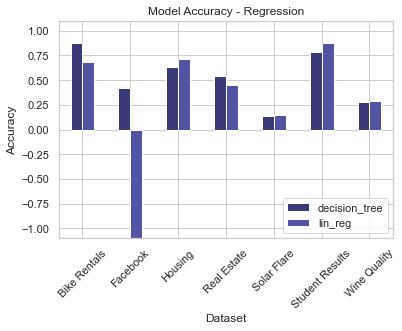

,decision_tree,lin_reg
Bike Rentals,0.875575,6.849385e-01
Facebook,0.424720,-7.969260e+18
Housing,0.628102,7.112623e-01
Real Estate,0.545831,4.488935e-01
Solar Flare,0.140032,1.458294e-01
Student Results,0.785123,8.753311e-01
Wine Quality,0.278780,2.850959e-01


In [4]:
reg_train_acc = np.zeros((len(regression_datasets),len(reg_models)))
reg_test_acc = np.zeros((len(regression_datasets),len(reg_models)))

for i in range(len(regression_datasets)):
    data = regression_datasets[i]
    X_train = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Xtrain.csv"), sep = ";").values
    X_test = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Xtest.csv"), sep = ";").values
    X_validation = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Xvalidation.csv"), sep = ";").values
    test_x = np.vstack([X_test, X_validation])
    
    y_train = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Ytrain.csv"), sep = ";").values
    y_test = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Ytest.csv"), sep = ";").values
    y_validation = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Yvalidation.csv"), sep = ";").values
    test_y = np.vstack([y_test, y_validation])
    
    for j in range(len(reg_models)):
        model = reg_models[j]

        reg = joblib.load(os.path.join(PATH, data, model, "cls.joblib"))
        
        train_acc = r2_score(y_train, reg.predict(X_train))
        test_acc = r2_score(test_y, reg.predict(test_x))

        reg_train_acc[i][j] = train_acc
        reg_test_acc[i][j] = test_acc

df_reg_acc = pd.DataFrame(reg_test_acc, index=[data_names[data] for data in regression_datasets],
                  columns = reg_models)

sns.set_theme(style="whitegrid", palette="tab20b")                  
df_reg_acc.plot.bar()
plt.xticks(rotation = 0)
plt.title("Model Accuracy - Regression")
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.ylim(-1.1, 1.1)
plt.xticks(rotation = 45)
#plt.savefig(final_folder+dataset+"_"+cls_method+"_"+bin_type+".eps")
plt.show()

df_reg_acc

# Generate Model Architecture Stats

In [5]:
def get_tree_characteristics(tree, feat_list, cur_depth = 0, lvl = 0, depths = [], split_nodes = [], leaf_nodes = []):

    left_child = tree.children_left[lvl]
    right_child = tree.children_right[lvl]
    
    if left_child == sklearn.tree._tree.TREE_LEAF:
        depths.append(cur_depth)
        leaf_nodes.append(lvl)
        
    else:
        split_nodes.append(lvl)
        depths, split_nodes, leaf_nodes = get_tree_characteristics(tree, feat_list, cur_depth+1, left_child, depths, split_nodes, leaf_nodes)
        depths, split_noes, leaf_nodes = get_tree_characteristics(tree, feat_list, cur_depth+1, right_child, depths, split_nodes, leaf_nodes)
        
    return depths, split_nodes, leaf_nodes

In [6]:
print("Decision Tree Characteristics")
char = pd.DataFrame(columns = ["Dataset", "Max Depth", "Splits", "Leaves"])

for data in datasets:
    split_nodes = []
    leaf_nodes = []
    
    cls = joblib.load(os.path.join(PATH, data, "decision_tree", "cls.joblib"))
    X_train = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Xtrain.csv"), sep = ";")
    depths, split_nodes, leaf_nodes = get_tree_characteristics(cls.tree_, X_train.columns, split_nodes = split_nodes, leaf_nodes = leaf_nodes)
    
    max_depth = cls.get_depth()
    splits = len(split_nodes)
    leaves = len(leaf_nodes)
    
    char = char.append({"Dataset":data_names[data], "Max Depth": max_depth, "Splits": splits, "Leaves": leaves}, ignore_index=True)
char

Decision Tree Characteristics


,Dataset,Max Depth,Splits,Leaves
0,Breast Cancer,4,6,7
1,COMPAS,11,50,51
2,Diabetes,5,8,9
3,Adult Income,17,54,55
4,Iris,1,1,2
5,Mushroom,10,17,18
6,Nursery,1,1,2
7,Bike Rentals,44,3918,3919
8,Facebook,20,21,22
9,Housing,22,345,346


# Tree Visualisation (DT)

In [7]:
from sklearn import tree
import pydotplus

dataset = "diabetes"

cls = joblib.load(os.path.join(PATH, dataset, "decision_tree", "cls.joblib"))
X_train = pd.read_csv(os.path.join(PATH, dataset, "datasets", dataset+"_Xtrain.csv"), sep = ";")

class_names = ["Negative", "Positive"]

dot_data = tree.export_graphviz(cls, out_file=None, feature_names=X_train.columns, class_names=class_names,
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

for node in graph.get_node_list():
    if node.get_attributes().get('label') is None:
        continue
    if 'samples = ' in node.get_attributes()['label']:
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = 0'
        node.set('label', '<br/>'.join(labels))
        node.set_fillcolor('white')

samples = X_train.values[:1]
decision_paths = cls.decision_path(samples)

for decision_path in decision_paths:
    for n, node_value in enumerate(decision_path.toarray()[0]):
        if node_value == 0:
            continue
        node = graph.get_node(str(n))[0]            
        node.set_fillcolor('green')
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = {}'.format(int(label.split('=')[1]) + 1)

        node.set('label', '<br/>'.join(labels))

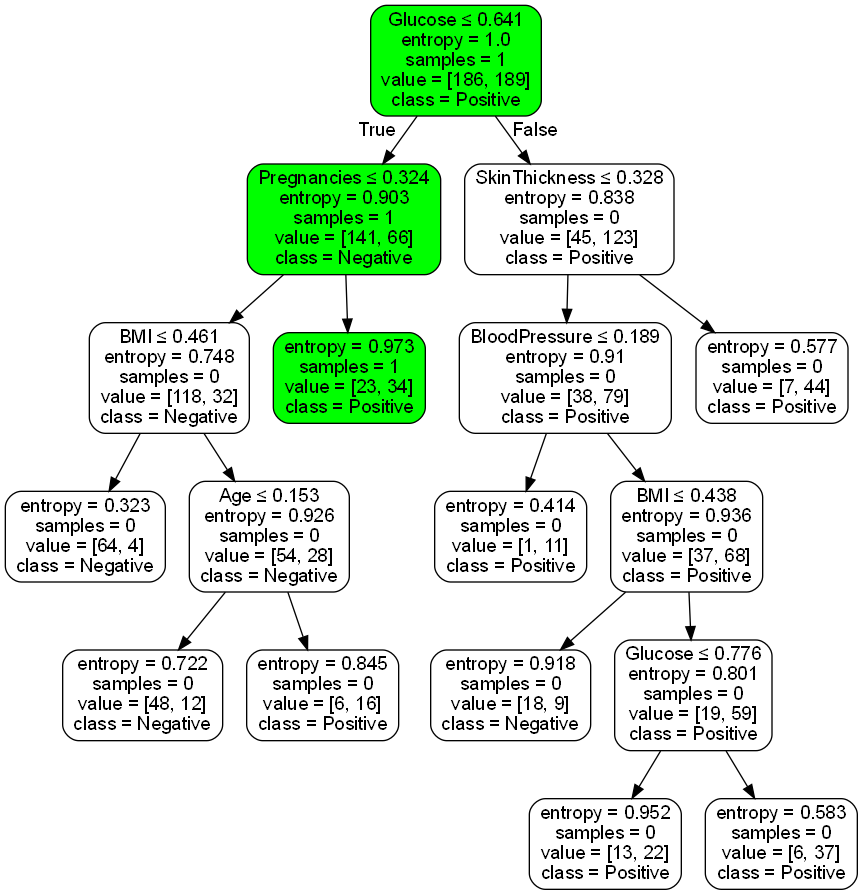

In [8]:
from IPython.display import Image
Image(graph.create_png())

# Coefficient Visualisation (Logit and Lin Reg)

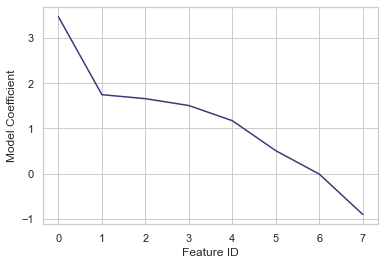

In [9]:
dataset = "diabetes"
model="logit"

cls = joblib.load(os.path.join(PATH, dataset, model, "cls.joblib"))
X_train = pd.read_csv(os.path.join(PATH, dataset, "datasets", dataset+"_Xtrain.csv"), sep = ";")

coefs = sorted(cls.coef_.reshape(X_train.shape[1]), reverse=True)
plt.plot(coefs)
plt.xlabel("Feature ID")
plt.ylabel("Model Coefficient")
plt.show()

# Likelihood Visualisation (Naive Bayes)

Pregnancies


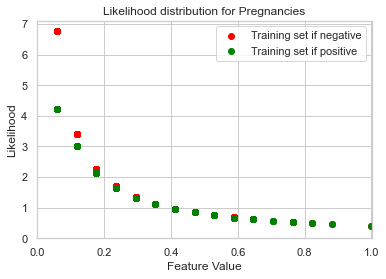

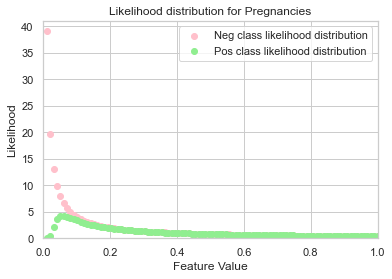

Glucose


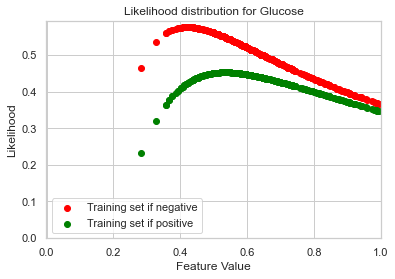

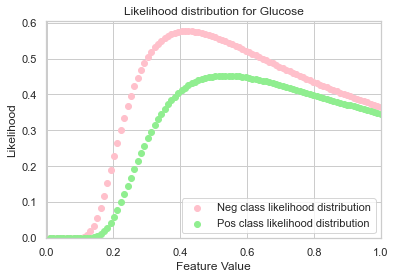

BloodPressure


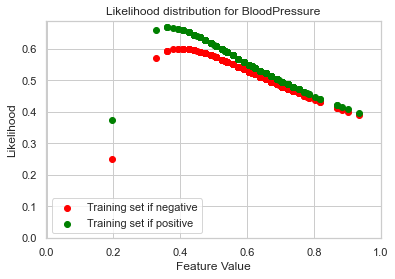

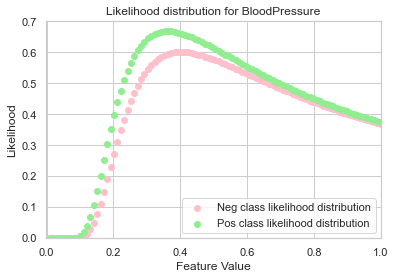

SkinThickness


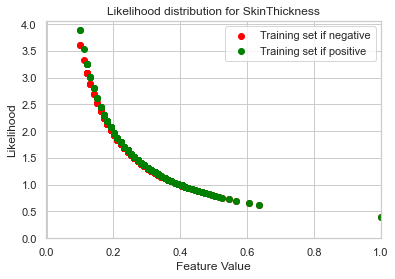

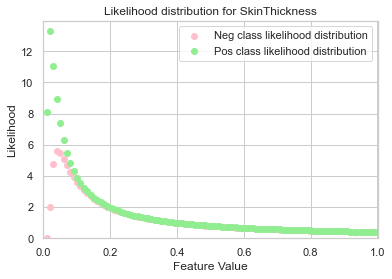

Insulin


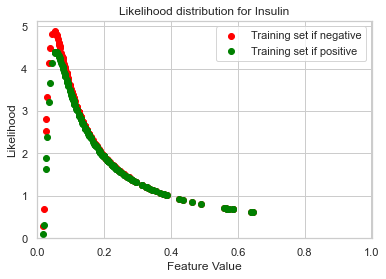

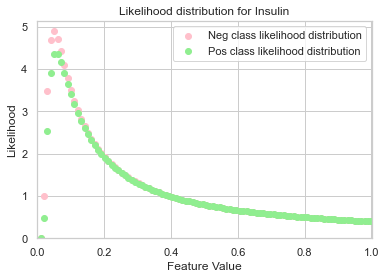

BMI


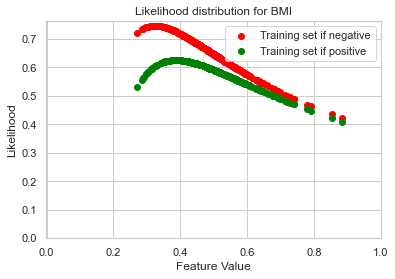

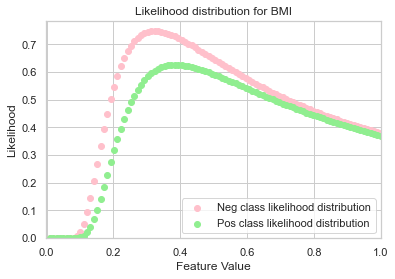

DiabetesPedigreeFunction


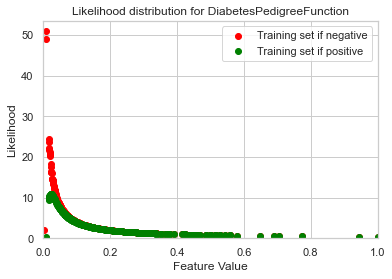

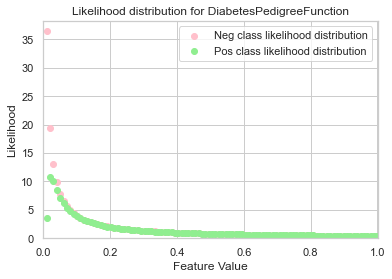

Age


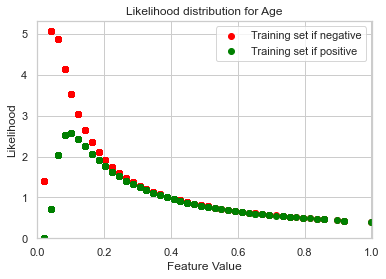

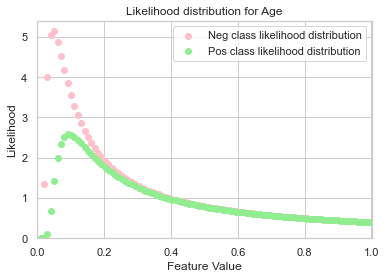

In [10]:
from scipy.stats import norm
dataset = "diabetes"

cls = joblib.load(os.path.join(PATH, dataset, "nb", "cls.joblib"))
X_train = pd.read_csv(os.path.join(PATH, dataset, "datasets", dataset+"_Xtrain.csv"), sep = ";")

means = cls.theta_.transpose()
std_devs = np.sqrt(cls.var_).transpose()
vals = X_train.values.transpose()
feat_list = X_train.columns

for i in range(len(feat_list)):
    print(feat_list[i])
    neg_lkhoods = norm.pdf(means[i][0], std_devs[i][0], vals[i])
    pos_lkhoods = norm.pdf(means[i][1], std_devs[i][1], vals[i])
    control_0 = norm.pdf(means[i][0], std_devs[i][0], np.linspace(0,1,100))
    control_1 = norm.pdf(means[i][1], std_devs[i][1], np.linspace(0,1,100))
    
    plt.scatter(vals[i], neg_lkhoods, color="red", label="Training set if negative")
    plt.scatter(vals[i], pos_lkhoods, color="green", label="Training set if positive")
    plt.xlim(-0.001,1.001)
    plt.ylim(ymin=-0.001)
    plt.title("Likelihood distribution for "+feat_list[i])
    plt.xlabel("Feature Value")
    plt.ylabel("Likelihood")
    plt.legend()
    plt.show()

    plt.scatter(np.linspace(0,1,100), control_0, color="pink", label="Neg class likelihood distribution")
    plt.scatter(np.linspace(0,1,100), control_1, color="lightgreen", label="Pos class likelihood distribution")
    plt.xlim(-0.001,1.001)
    plt.ylim(ymin=-0.001)
    plt.title("Likelihood distribution for "+feat_list[i])
    plt.xlabel("Feature Value")
    plt.ylabel("Likelihood")
    plt.legend()
    plt.show()